Student Name: Ronaldlee Ejalu

CSC 583

FinalProject 

In [1]:
!pip install transformers datasets simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datasets import Dataset

In [3]:
# mount the drive
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [4]:
# change the drive to my working directory
%cd gdrive/MyDrive/CSC583

/content/gdrive/MyDrive/CSC583


# Load the data

In [5]:
df_raw = pd.read_csv('data/FakeCovid_July2020.csv', encoding='utf-8', sep=',')
df_raw.head()

ID                                 ref_category_title  \
0  FC1  FALSE: The coronavirus is an amplified bacteri...   
1  FC2  FALSE: A law allows people to go for a run dur...   
2  FC3  False: Chinese converting to Islam after reali...   
3  FC4  False: Bat market and bat meat are being sold ...   
4  FC5  False: You can self-diagnose COVID-19 by holdi...   

                                             ref_url  \
0  https://www.poynter.org/?ifcn_misinformation=t...   
1  https://www.poynter.org/?ifcn_misinformation=a...   
2  https://www.poynter.org/?ifcn_misinformation=c...   
3  https://www.poynter.org/?ifcn_misinformation=b...   
4  https://www.poynter.org/?ifcn_misinformation=y...   

                                              pageid            verifiedby  \
0  https://www.poynter.org/ifcn-covid-19-misinfor...        La Silla Vacía   
1  https://www.poynter.org/ifcn-covid-19-misinfor...            Newtral.es   
2  https://www.poynter.org/ifcn-covid-19-misinfor...         FactCrescendo   
3  https://www.poynter.org/ifcn-covid-19-misinfor...   France 24 Observers   
4  https://www.poynter.org/ifcn-covid-19-misinfor...          Agência Lupa   

     country  class                                              title  \
0   Colombia  FALSE   The coronavirus is an amplified bacteria rela...   
1      Spain  FALSE   A law allows people to go for a run during th...   
2      India  False   Chinese converting to Islam after realizing t...   
3     France  False   Bat market and bat meat are being sold in Wuhan.   
4     Brazil  False   You can self-diagnose COVID-19 by holding you...   

  published_date   country1 country2 country3 country4  \
0    2020/06/17    Colombia      NaN      NaN      NaN   
1    2020/04/09       Spain      NaN      NaN      NaN   
2    2020/02/20       India      NaN      NaN      NaN   
3    2020/01/27      France      NaN      NaN      NaN   
4    2020/03/16      Brazil      NaN      NaN      NaN   

                                      article_source ref_source  \
0  https://lasillavacia.com/detector-video-falso-...    poynter   
1  https://www.newtral.es/la-broma-de-que-a-los-r...    poynter   
2  https://english.factcrescendo.com/2020/02/20/c...    poynter   
3  https://observers.france24.com/fr/20200130-int...    poynter   
4  https://piaui.folha.uol.com.br/lupa/2020/03/16...    poynter   

                                        source_title  \
0  Detector a video falso que dice que el Covid e...   
1  La broma de que a los “runners” se les permite...   
2  Are Chinese people converting to Islam in fear...   
3  La soupe à la chauve-souris, un plat prisé en ...   
4  #Verificamos: É falso que quem consegue prende...   

                                        content_text category lang  
0  La Silla Vacía usa Cookies para mejorar la exp...      NaN   es  
1  En los últimos días nos ha llegado una consult...      NaN   es  
2  The fact behind every news!, Ever since the Wo...      NaN   en  
3  عربي, English, Français, Contribuer, فارسی, عر...      NaN   fr  
4  , “O novo CORONA VÍRUS pode não mostrar sinais...      NaN   pt

In [6]:
# filter out the entries that are in the English language
cond = df_raw['lang'] == 'en'
df_raw = df_raw[cond]

In [7]:
df_raw.head(3)

ID                                 ref_category_title  \
2  FC3  False: Chinese converting to Islam after reali...   
6  FC7  MISLEADING: Captions on a reuploaded video abo...   
8  FC9  Mostly True: Ghana has 307 ambulances with mob...   

                                             ref_url  \
2  https://www.poynter.org/?ifcn_misinformation=c...   
6  https://www.poynter.org/?ifcn_misinformation=c...   
8  https://www.poynter.org/?ifcn_misinformation=g...   

                                              pageid      verifiedby  \
2  https://www.poynter.org/ifcn-covid-19-misinfor...   FactCrescendo   
6  https://www.poynter.org/ifcn-covid-19-misinfor...      VERA Files   
8  https://www.poynter.org/ifcn-covid-19-misinfor...       GhanaFact   

        country        class  \
2         India        False   
6   Philippines   MISLEADING   
8         Ghana  Mostly True   

                                               title published_date  \
2   Chinese converting to Islam after realizing t...    2020/02/20    
6   Captions on a reuploaded video about the U.S....    2020/05/09    
8   Ghana has 307 ambulances with mobile ventilat...    2020/04/03    

       country1 country2 country3 country4  \
2         India      NaN      NaN      NaN   
6   Philippines      NaN      NaN      NaN   
8         Ghana      NaN      NaN      NaN   

                                      article_source ref_source  \
2  https://english.factcrescendo.com/2020/02/20/c...    poynter   
6  https://verafiles.org/articles/vera-files-fact...    poynter   
8  https://ghanafact.com/fact-check-does-ghanas-3...    poynter   

                                        source_title  \
2  Are Chinese people converting to Islam in fear...   
6  VERA FILES FACT CHECK: Remdesivir to ‘end’ COV...   
8  Fact-check: Does Ghana have 307 ambulances wit...   

                                        content_text category lang  
2  The fact behind every news!, Ever since the Wo...      NaN   en  
6  AUTHOR, VERA Files, DATE, May 08, 2020, SHARE,...      NaN   en  
8  Source: Dr Anthony Nsiah Asare, Verdict: Mostl...      NaN   en

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2845 entries, 2 to 7621
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  2845 non-null   object
 1   ref_category_title  2580 non-null   object
 2   ref_url             2845 non-null   object
 3   pageid              2580 non-null   object
 4   verifiedby          2845 non-null   object
 5   country             2580 non-null   object
 6   class               2845 non-null   object
 7   title               2845 non-null   object
 8   published_date      2845 non-null   object
 9   country1            2580 non-null   object
 10  country2            119 non-null    object
 11  country3            24 non-null     object
 12  country4            2 non-null      object
 13  article_source      2845 non-null   object
 14  ref_source          2845 non-null   object
 15  source_title        2809 non-null   object
 16  content_text        2845

In [9]:
df_raw['class'] = df_raw['class'].str.lower()

In [10]:
df_raw['class'].value_counts()

false                          2266
misleading                      233
mostly false                    117
mixture                          41
true                             34
partly false                     26
news                             23
mostly true                      15
correct attribution              12
half true                        11
miscaptioned                     10
unproven                         10
no evidence                       9
misattributed                     7
(org. doesn't apply rating)       7
labeled satire                    5
two pinocchios                    3
scam                              3
partly true                       2
not true                          2
partially false                   1
fake                              1
pants on fire                     1
in dispute                        1
partially correct                 1
unlikely                          1
collections                       1
mixed                       

In [11]:
conditions = [ df_raw['class'] == 'false', df_raw['class'] == 'true', \
              df_raw['class'] == 'mostly true', df_raw['class'] == 'mostly false', \
              df_raw['class'] == 'partly true', df_raw['class'] == 'partly false', \
              df_raw['class'] == 'half true', df_raw['class'] == 'partially false', \
              df_raw['class'] == 'partially true', df_raw['class'] == 'partially correct',\
              df_raw['class'] == 'mixed', \
              df_raw['class'] != 'true', df_raw['class'] != 'false'\
            ]

choices = ['FALSE','TRUE', 'TRUE', 'FALSE', 'TRUE','FALSE','TRUE' ,'FALSE', 'TRUE', 'TRUE', 'TRUE','UNKNOWN', 'UNKNOWN']
df_raw['class'] =np.select(conditions, choices, default=np.nan)

In [12]:
df_raw['class'].value_counts()

FALSE      2410
UNKNOWN     370
TRUE         65
Name: class, dtype: int64

In [13]:
df_raw.shape

(2845, 19)

In [14]:
# manual one hot encoding of the class values into 0, 1 and 2 
cond_label = [df_raw['class'] == 'FALSE', \
              df_raw['class'] == 'TRUE', \
              df_raw['class'] == 'UNKNOWN'
              ]

choices_label = [0, 1, 2]
df_raw['label'] =np.select(cond_label, choices_label, default=np.nan)
# change the type of the label column to an integer
df_raw['label'] = df_raw['label'].astype('int')

In [15]:
# let's extract out the attributes of interest
df_raw_ds = df_raw[['ID', 'label', 'class', 'content_text']]

In [16]:
df_raw_ds['label'].value_counts()

0    2410
2     370
1      65
Name: label, dtype: int64

In [17]:
df_raw_ds.head()

ID  label    class                                       content_text
2    FC3      0    FALSE  The fact behind every news!, Ever since the Wo...
6    FC7      2  UNKNOWN  AUTHOR, VERA Files, DATE, May 08, 2020, SHARE,...
8    FC9      1     TRUE  Source: Dr Anthony Nsiah Asare, Verdict: Mostl...
9   FC10      0    FALSE  More Info, Trying to focus on school work at h...
10  FC11      0    FALSE  A photo of hundreds of neat piles of bedding a...

In [18]:
# separate the class from the data frame columns
labels_np = df_raw['class'].values

In [19]:
# apply one hot encoding
labels_one_hot_enc = pd.get_dummies(labels_np)
labels_one_hot_enc.shape

(2845, 3)

In [20]:
# convert the one encoded labels into a nump array
labels_one_hot_np = labels_one_hot_enc.to_numpy()
print('Shape of the numpy array: %s'%str(labels_one_hot_np.shape))
labels_one_hot_np

Shape of the numpy array: (2845, 3)


array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [21]:
# drop the class column since it is now encoded
df_raw.drop('class', axis=1, inplace = True)

In [22]:
# seperate the contex_text from the data frame
content_texts = df_raw['content_text'].values
type(content_texts)

numpy.ndarray

In [23]:
# lets extract the labels and text separately
label = df_raw_ds['label']
content_texts = df_raw_ds['content_text']

In [24]:
label.shape

(2845,)

In [25]:
content_texts.shape

(2845,)

# Stratified Sampling

In [26]:
X_train, X_test, y_train, y_test = train_test_split(content_texts, label, test_size=0.5, random_state=1, stratify=label)

In [27]:
y_train.value_counts(normalize=True) * 100

0    84.739803
2    13.009845
1     2.250352
Name: label, dtype: float64

In [28]:
y_test.value_counts(normalize=True) * 100

0    84.680253
2    13.000703
1     2.319044
Name: label, dtype: float64

Both our target values of 2 (Unknown)and 1 (True) of the train and test sets balance out. 

In [29]:
# convert the series into a list
X_train_L = X_train.tolist()
X_test_L = X_test.tolist()
y_train_L = y_train.tolist()
y_test_L = y_test.tolist()

# Convert the list into a list of dictionary types

In [30]:
# convert the training list into a list of dictionary type
X_train_List_of_dict = []
for key, value in zip(y_train_L, X_train_L):
  data = {
      "label" : key,
      "text" : value
  }
  #print(type(key), type(value))
  X_train_List_of_dict.append(data)

# convert the test list into a list of dictionary type
X_test_List_of_dict = []
for key, value in zip(y_test_L, X_test_L):
  data = {
      "label" : key,
      "text" : value
  }
  X_test_List_of_dict.append(data)

# let's load a data set into a format that suits our model

verification of the list of dictionaries

In [31]:
for i in range(len(X_train_List_of_dict) - 1420):
  print(X_train_List_of_dict[i])

{'label': 0, 'text': ', A MESSAGE IS being shared across Facebook and WhatsApp claiming that criminals are handing out chemically-laced facemasks to members of the public so they can drug and rob them., The rumour, which started on Facebook, reads:, “WARNING A new thing circulating now. People are going door to door handing out masks. They say it’s a new initiative from local government. They ask you to please put it on to see if it fits. It’s doused with chemicals which knocks you out cold. They then rob you!! Please DO NOT accept masks from strangers. Remember friends, it’s a critical time and people are desperate, the crime rate will spike. Please be cautious & safe!!”, The screenshot in question., The message, which does not name any specific locations, has been shared thousands of times around Ireland and the UK as well as in the US and parts of south-east Asia., An Garda Síochána, when asked for evidence as to whether the message was false which would help to stop it from being s

In [32]:
X_train_set = Dataset.from_list(X_train_List_of_dict)
X_test_set = Dataset.from_list(X_test_List_of_dict)

In [33]:
# convert both the training and test set into torch format
X_train_set = X_train_set.with_format('torch')
X_test_set = X_test_set.with_format('torch')

In [34]:
# look at the 100th element from the training data set
print(X_train_set[100])

{'label': tensor(0), 'text': '"The post’s caption reads: “Good News! Wuhans CORONA VIRUS can be cured By one bowl of freshly boiled GARLIC water.", "Old chinese doctor has proven its efficacy. Many patients has also proven this to be effective . 8 cloves of chopped GARLICs and add 7cups of water then bring to boil., "Eat and drink the boiled GARLIC water, overnight improvement and healing.\\xa0Glad to share this😊\\xa0ctto, "Please like or Follow this page for MORE HELPFULL post🙏 Thank u!😘.”, The post also carries a text image that reads: “Tracking the Wuhan Coronavirus. Everything you need to read about the deadly pandemic; what it is. How it’s spreading, and how to stop it.”, Below is a screenshot of the misleading post:, The novel coronavirus has killed at least 490 and infected more than 24,000 people in China since its outbreak in Wuhan in early December 2019, AFP reported\\xa0on February 5, 2020., Posts with a similar claim were also published on\\xa0Facebook here, here, here and 

In [35]:
# look at the 100th element from the test data set
print(X_test_set[100])

{'label': tensor(0), 'text': 'According to News NT, microbiologist Elisa Granato died two days after she was administered Britain’s first trial COVID-19 vaccine. “A statement by the researchers said Elisa had complications few hours after taking the vaccine and died while on admission (sic),” the article read., Granato was one of the first two people to take part in the human trial of a\\xa0new COVID-19 vaccine at Oxford University on April 23, 2020. The scientist told BBC in an interview that the decision was to “support the scientific process”., , As part of the process, the Oxford Vaccine Group, which is conducting the trial,\\xa0hopes to vaccinate about 800 more people in Britain in the next month., History of misinformation, The viral claim appears on Twitter here and here, while the link to the publication was also shared in several Facebook posts published globally, including in Australia, Nigeria, Kenya\\xa0and the US., But the website has a history of spreading misinformation 

In [36]:
from datasets import DatasetDict

In [37]:
datasets = DatasetDict(
    {
        'train' : X_train_set, \
        'test' : X_test_set
     }
                      )

In [38]:
print(datasets['train'][100])

{'label': tensor(0), 'text': '"The post’s caption reads: “Good News! Wuhans CORONA VIRUS can be cured By one bowl of freshly boiled GARLIC water.", "Old chinese doctor has proven its efficacy. Many patients has also proven this to be effective . 8 cloves of chopped GARLICs and add 7cups of water then bring to boil., "Eat and drink the boiled GARLIC water, overnight improvement and healing.\\xa0Glad to share this😊\\xa0ctto, "Please like or Follow this page for MORE HELPFULL post🙏 Thank u!😘.”, The post also carries a text image that reads: “Tracking the Wuhan Coronavirus. Everything you need to read about the deadly pandemic; what it is. How it’s spreading, and how to stop it.”, Below is a screenshot of the misleading post:, The novel coronavirus has killed at least 490 and infected more than 24,000 people in China since its outbreak in Wuhan in early December 2019, AFP reported\\xa0on February 5, 2020., Posts with a similar claim were also published on\\xa0Facebook here, here, here and 

In [39]:
from datasets import ClassLabel
import random 
from IPython.display import display, HTML

**Disclaimer: I borrowed this line of code from Prof. Noriko**

In [40]:
def show_random_elements(dataset, num_examples=10):
  assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
  picks = []
  for _ in range(num_examples):
    pick = random.randint(0, len(dataset)-1)
    while pick in picks: # to avoid duplicates
      pick = random.randint(0, len(dataset)-1)
    picks.append(pick)

  df = pd.DataFrame(dataset[picks])

  for column, typ in dataset.features.items():
    print("column={}, type={}".format(column, typ))
    if isinstance(typ, ClassLabel):
      df[column] = df[column].transform(lambda i: typ.names[i])
  display(HTML(df.to_html()))

In [41]:
show_random_elements(datasets["train"])

column=label, type=Value(dtype='int64', id=None)
column=text, type=Value(dtype='string', id=None)


# create a tokenizer for the whole dataset

In [43]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [44]:
def tokenize_function(examples):
  """Function that tokenizes text"""
  return tokenizer(examples['text'], padding='max_length', truncation=True)

In [45]:
# tokenize the whole data set.
tokenized_datasets = datasets.map(tokenize_function, batched=True)

Map:   0%|          | 0/1422 [00:00<?, ? examples/s]

Map:   0%|          | 0/1423 [00:00<?, ? examples/s]

create the train/test datasets and model, and train the model using Trainer

In [46]:
train_dataset = tokenized_datasets["train"].shuffle(seed=42)
test_dataset = tokenized_datasets["test"].shuffle(seed=42)


print(f'Train shape: {train_dataset.shape}, Test shape: {test_dataset.shape}')

Train shape: (1422, 5), Test shape: (1423, 5)


In [47]:
!pip install --upgrade accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We load the model and specify the number of expected labels

In [48]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=3)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initi

we create a TrainingArguments class which contains all the hyperparameters you can tune as well as flags for activating different training options. So, first we specify where to save the checkpoints from our training.

In [49]:
!pip install -q git+https://github.com/huggingface/peft.git git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [50]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy='epoch')

Since Trainer doesn't automatically evaluate model performance during training, we a pass Trainer a function to compute metrics. The Evaluaate library provides a simple accuracy function you can load with the evaluate.load function.

In [51]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 10.1 MB/s eta 0:00:00


In [52]:
import evaluate

metric = evaluate.load("accuracy")

We define a function compute_metrics that calls Compute on metric to calculate the accuracy of your predictions. We convert the predictions to logits before passing them to compute.

In [53]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

We create a Trainer object with our model, training arguments, training and test datasets and evaluation function. 

In [54]:
trainer = Trainer(model=model, \
                  args = training_args, \
                  train_dataset=train_dataset, \
                  eval_dataset = test_dataset, \
                  compute_metrics = compute_metrics
                  )

We then fine-tune the model by calling train()

In [55]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


TrainOutput(global_step=534, training_loss=0.5079256586367717, metrics={'train_runtime': 682.9406, 'train_samples_per_second': 6.247, 'train_steps_per_second': 0.782, 'total_flos': 1122441840027648.0, 'train_loss': 0.5079256586367717, 'epoch': 3.0})

In [56]:
# generate predictions for the test set
predictions = trainer.predict(test_dataset)

In [57]:
preds = np.array([np.argmax(entry, axis=-1) for entry in predictions[0]])
print(preds)

[0 0 0 ... 0 0 0]


In [58]:
f1_metric = evaluate.load('f1')

results = f1_metric.compute(predictions=preds, references=predictions[1], average='macro')
print(round(results['f1'], 3))

0.306


The macro-average treats all classes equally. 

In [59]:
results = f1_metric.compute(predictions=preds, references=predictions[1], average='micro')
print(round(results['f1'], 3))

0.847


In [60]:
# save the model
saved_dir = '/content/gdrive/MyDrive/CSC583/data/saved_results'

tokenizer.save_pretrained(saved_dir)
model.save_pretrained(saved_dir)

In [61]:
%ls -l /content/gdrive/MyDrive/CSC583/data/saved_results

total 424032
-rw------- 1 root root       884 Jun 11 03:13 config.json
-rw------- 1 root root 433323125 Jun 11 03:13 pytorch_model.bin
-rw------- 1 root root       125 Jun 11 03:13 special_tokens_map.json
-rw------- 1 root root       315 Jun 11 03:13 tokenizer_config.json
-rw------- 1 root root    669188 Jun 11 03:13 tokenizer.json
-rw------- 1 root root    213450 Jun 11 03:13 vocab.txt


In [62]:
from sklearn.metrics import classification_report
print(classification_report(predictions[1], preds))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1205
           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00       185

    accuracy                           0.85      1423
   macro avg       0.28      0.33      0.31      1423
weighted avg       0.72      0.85      0.78      1423



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Since our data set is imbalanced, the weighted average score is 0.78

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions[1], preds)

array([[1205,    0,    0],
       [  33,    0,    0],
       [ 185,    0,    0]])

Write the results to a file

In [64]:
outfile = open('true_positives.csv', 'w')
for target, output, data in zip(predictions[1], preds, test_dataset['text']):
  if target == output:
    outfile.write(f'{output}, {data}')
outfile.close()

## Data Augmentation

In [65]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 30.5 MB/s eta 0:00:00


In [66]:
from tqdm import tqdm
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as naf

from nlpaug.util import Action
from sklearn.utils import shuffle

In [67]:
aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased', action="insert")
#augmented_text = aug.augment(text)

In [68]:
def augment_text(df,samples=300,pr=0.2):
    aug.aug_p=pr
    new_text=[]

    ##selecting the minority class samples
    df_n=df[df.label==1].reset_index(drop=True)

    ## data augmentation loop
    for i in tqdm(np.random.randint(0,len(df_n),samples)):

            text = df_n.iloc[i]['text']
            augmented_text = aug.augment(text)
            new_text.append(augmented_text)


    ## dataframe
    new=pd.DataFrame({'text':new_text,'label':1})
    df=shuffle(df.append(new).reset_index(drop=True))
    return df

In [69]:
# create a dictionary by passing series as values
dict_f = {'text': X_train, \
          'label': y_train \
          }
# create a train dataframe
df_train = pd.DataFrame(dict_f)   

In [70]:
df_train.shape

(1422, 2)

In [71]:
df_train.head(4)

text  label
4537  , A MESSAGE IS being shared across Facebook an...      0
6334  Speak Now, The Covid-19 pandemic has claimed t...      1
318   Responding to comments on his own post, the au...      0
5280  Read more, The quotes in these graphics featur...      0

In [72]:
## change samples to 0 for no augmentation
train = augment_text(df_train,samples=1000)   # before it was 400

100%|██████████| 1000/1000 [10:05<00:00,  1.65it/s]
<ipython-input-68-a526a80b7e7f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=shuffle(df.append(new).reset_index(drop=True))


In [73]:
train['label'].value_counts()

0    1205
1    1032
2     185
Name: label, dtype: int64

In [74]:
y_test.value_counts() 

0    1205
2     185
1      33
Name: label, dtype: int64

Separate the labels from text

In [75]:
X_train_L = train['text'].tolist()
y_train_L = train['label'].tolist()

In [76]:
len(X_train_L)

2422

In [77]:
len(y_train_L)

2422

## Convert the list into a list of dictinary types

In [78]:
# convert the training list into a list of dictionary type
X_train_List_of_dict = []
for key, value in zip(y_train_L, X_train_L):
  data = {
      "label" : key,
      "text" : str(value)
  }
  X_train_List_of_dict.append(data)

## let's load the trainind data set into a format that suits our model

In [79]:
X_train_set = Dataset.from_list(X_train_List_of_dict)
len(X_train_set)

2422

In [80]:
# convert the training data set into torch format
X_train_set = X_train_set.with_format('torch')

In [81]:
# look at the 318th element from the training data set
print(X_train_set[318])

{'label': tensor(0), 'text': 'The post claims that USAID and Uganda Red Cross Society are undertaking research to ascertain the impact of COVID-19 on communities, and are offering research jobs for 10 research supervisors, 12 data entry assistants and 15 research assistants in every sub-county across Uganda., Interested applicants are required to send their resumes, accompanied with their academic transcripts to a Gmail address, which is different from the legitimate address used by the RedCross Society., The advertisement says each staff member will be entitled to a daily allowance of UGX10,000 and an additional UGX 5,000 would be given for each respondent attended to., The spokesperson of the United States Embassy in Kampala, Mr Phil Dimon, told PesaCheck that USAID was not involved in this initiative, and that the information in the Facebook post was not accurate., The job advert does not appear on USAID East Africa’s website, Twitter account or Facebook page., Likewise, the Uganda 

In [82]:
datasets = DatasetDict(
    {
        'train' : X_train_set, \
        'test'  : X_test_set
    }
                      )

In [83]:
# print the 318th element
print(datasets['train'][318])

{'label': tensor(0), 'text': 'The post claims that USAID and Uganda Red Cross Society are undertaking research to ascertain the impact of COVID-19 on communities, and are offering research jobs for 10 research supervisors, 12 data entry assistants and 15 research assistants in every sub-county across Uganda., Interested applicants are required to send their resumes, accompanied with their academic transcripts to a Gmail address, which is different from the legitimate address used by the RedCross Society., The advertisement says each staff member will be entitled to a daily allowance of UGX10,000 and an additional UGX 5,000 would be given for each respondent attended to., The spokesperson of the United States Embassy in Kampala, Mr Phil Dimon, told PesaCheck that USAID was not involved in this initiative, and that the information in the Facebook post was not accurate., The job advert does not appear on USAID East Africa’s website, Twitter account or Facebook page., Likewise, the Uganda 

In [84]:
# let's tokenize the whole data set
tokenized_datasets = datasets.map(tokenize_function, batched=True)

Map:   0%|          | 0/2422 [00:00<?, ? examples/s]

Map:   0%|          | 0/1423 [00:00<?, ? examples/s]

In [85]:
# create the train/test datasets and model, and train the model using the Trainer
train_dataset = tokenized_datasets["train"].shuffle(seed=42)
test_dataset = tokenized_datasets["test"].shuffle(seed=42)

In [86]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=3)
#  let's try freezing lower layers
for name, param in model.named_parameters():
  if name.startswith("bert.encoder.layer.0."):
    param.requires_grad = False

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initi

In [87]:
training_args = TrainingArguments(output_dir="test_trainer", \
                                  evaluation_strategy='epoch', \
                                  learning_rate=1e-5, \
                                  num_train_epochs=5, \
                                  per_device_train_batch_size=16, \
                                  per_device_eval_batch_size=16 \
                                  #weight_decay=4e-5,\
                                  #max_grad_norm=0.5
                                  )

We create a Trainer object with our model, training arguments, training and test_datasets and evaluation function.

In [88]:
trainer = Trainer(model=model, \
                  args = training_args, \
                  train_dataset=train_dataset, \
                  eval_dataset = test_dataset, \
                  compute_metrics = compute_metrics
                  )

Let's compute the class weights

In [89]:

from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_wts = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train.to_numpy())
class_wts


array([ 0.393361  , 14.8125    ,  2.56216216])

In [90]:
from torch import nn
import torch

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss (suppose one has 3 labels with different weights)
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor([ 0.393361  , 14.8125    ,  2.56216216], device=model.device))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [91]:
trainer = CustomTrainer(model=model, \
                  args = training_args, \
                  train_dataset=train_dataset, \
                  eval_dataset = test_dataset, \
                  compute_metrics = compute_metrics
                  )

Fine-tune the model by calling train()

In [92]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


TrainOutput(global_step=760, training_loss=0.10901455628244501, metrics={'train_runtime': 1340.8226, 'train_samples_per_second': 9.032, 'train_steps_per_second': 0.567, 'total_flos': 3186303488686080.0, 'train_loss': 0.10901455628244501, 'epoch': 5.0})

In [93]:
# generate predictions for the test set
predictions = trainer.predict(test_dataset)

In [94]:
preds = np.array([np.argmax(entry, axis=-1) for entry in predictions[0]])

In [95]:
f1_metric = evaluate.load('f1')

results = f1_metric.compute(predictions=preds, references=predictions[1], average='macro')
print(round(results['f1'], 3))

0.533


In [115]:
f1_metric = evaluate.load('f1')

results = f1_metric.compute(predictions=preds, references=predictions[1], average='micro')
print(round(results['f1'], 3))

0.75


In [96]:
print(classification_report(predictions[1], preds))

              precision    recall  f1-score   support

           0       0.93      0.77      0.85      1205
           1       0.50      0.24      0.33        33
           2       0.31      0.68      0.43       185

    accuracy                           0.75      1423
   macro avg       0.58      0.57      0.53      1423
weighted avg       0.84      0.75      0.78      1423



In [97]:
# derive a confusion matrix
confusion_matrix(predictions[1], preds)

array([[933,   5, 267],
       [ 12,   8,  13],
       [ 56,   3, 126]])

Since we have an imbalanced data set, we use the weighted average score of 0.78

## Generate explanations of the predictions made by the model using XAI techniques that apply to text.

In [98]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 37.2 MB/s eta 0:00:00


In [99]:
import shap
import transformers

Prepare the data set.

In [100]:
data = pd.DataFrame({'text':X_train_set['text'],'label':X_train_set['label']})
data.head(3)

text  label
0  CLAIM, An image of hundreds of people cramped ...      0
1  ['more info, as more people are infected with ...      1
2  The article, published on March 15, 2020, says...      0

load the model, tokenizer and build a pipeline

In [101]:
# load the model and tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained("bert-base-cased", use_fast=True)
model = transformers.AutoModelForSequenceClassification.from_pretrained("bert-base-cased").cuda()

# build a pipeline object to do predictions
pred = transformers.pipeline("text-classification", model=model, tokenizer=tokenizer, device=0, return_all_scores=True, truncation=True,max_length=512)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initi

Create an explainer object for the pipeline.

In [102]:
explainer = shap.Explainer(pred)

Compute the Shap values

In [103]:
shap_values = explainer(data['text'][:3])

Token indices sequence length is longer than the specified maximum sequence length for this model (696 > 512). Running this sequence through the model will result in indexing errors
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  33%|███▎      | 1/3 [00:00<?, ?it/s]You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 3/3 [00:42<00:00, 10.00s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 4it [01:01, 20.46s/it]


Visualizing the impact on the output classes:

In [104]:
shap.plots.text(shap_values)

Output hidden; open in https://colab.research.google.com to view.

Visualizing the impact on a single class. 

In [105]:
# visualizing the impact of class 1
shap.plots.text(shap_values[:, :, 1])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [106]:
# visualizing the impact of class 0
shap.plots.text(shap_values[:, :, 0])

Plotting the words that impact class 0

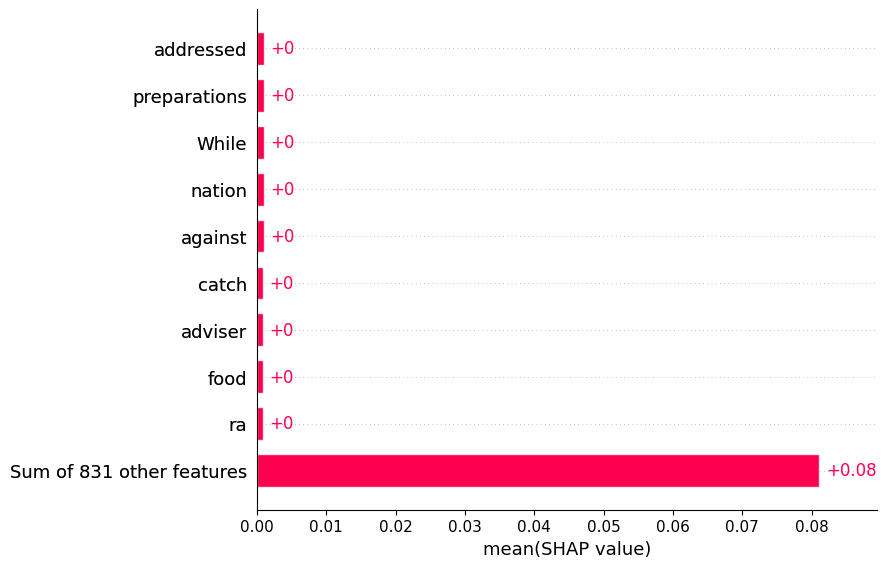

In [107]:
shap.plots.bar(shap_values[:,:,0].mean(0))

Plotting the words that impact class 1

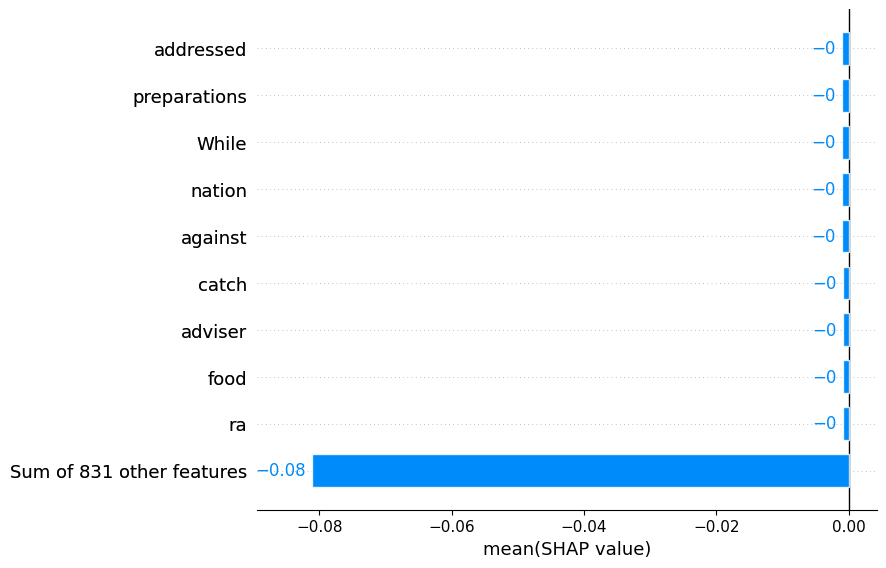

In [108]:
shap.plots.bar(shap_values[:,:,1].mean(0))

#Ensembles